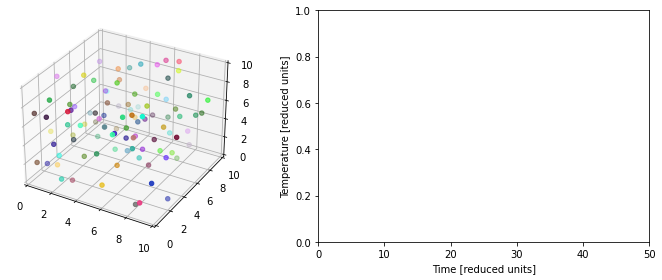

'md1.mp4'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Initialize simulation parameters
N = 100  # number of particles
L = np.array([10, 10, 10])  # simulation box size
r_min = 0.9  # minimum separation
h = 1e-3  # time step size
t_end = 50  # total simulation time

duration = 10  # video duration in seconds
fps = 50  # frames per second
frames = duration * fps
stepsPerFrame = round(t_end / h / frames)

# 2. Initialize particle positions
def initialize_positions(N, L, r_min):
    x = np.zeros((3, N))
    i = 0
    while i < N:
        x[:, i] = np.random.rand(3) * L
        for j in range(i):
            dx = x[:, j] - x[:, i]
            dx = dx - np.round(dx / L) * L
            if np.linalg.norm(dx) < r_min:
                i -= 1
                break
        i += 1
    return x

x = initialize_positions(N, L, r_min)
v = np.zeros((3, N))
a = np.zeros((3, N))

# 3. Define the function to compute forces and update positions and velocities
def update_particles(x, v, L, h):
    a = np.zeros((3, N))
    # Lennard-Jones force
    for i in range(N):
        for j in range(i):
            dx = x[:, j] - x[:, i]
            dx = dx - np.round(dx / L) * L
            r = np.linalg.norm(dx)
            f = 24 / r * (2 / r**12 - 1 / r**6) * (dx / r)
            a[:, i] = a[:, i] - f
            a[:, j] = a[:, j] + f
            
    # semi-implicit Euler
    v += h * a
    x += h * v
    
    # restrict particle positions to simulation box
    x = x - np.floor(x / L[:, None]) * L[:, None]
    return x, v

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

p3 = ax1.scatter(x[0, :], x[1, :], x[2, :], c=np.random.rand(N, 3))
ax1.set_xlim(0, L[0])
ax1.set_ylim(0, L[1])
ax1.set_zlim(0, L[2])
ax1.grid(True)

p, = ax2.plot([0], [0], linewidth=2)
ax2.set_xlim(0, t_end)
ax2.set_ylim(0, 1)
ax2.set_xlabel('Time [reduced units]')
ax2.set_ylabel('Temperature [reduced units]')

plt.tight_layout()
plt.show()

# 5. Define the animation function
def animate(frame):
    global x, v
    for _ in range(stepsPerFrame):
        x, v = update_particles(x, v, L, h)
    p3._offsets3d = (x[0, :], x[1, :], x[2, :])
    current_time = frame * stepsPerFrame * h
    K = 0.5 * np.sum(v * v)
    temperature = 2 * K / (3 * (N - 1))
    p.set_xdata(np.append(p.get_xdata(), current_time))
    p.set_ydata(np.append(p.get_ydata(), temperature))
    return p3, p

# 6. Create the animation and save it
ani = FuncAnimation(fig, animate, frames=frames, blit=False)
video_path = "md1.mp4"
ani.save(video_path, writer="ffmpeg", fps=fps)

video_path

# ESTIMATED TIME : 179 MIN AND 26 S